In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Import data
data1 = pd.read_csv("dataset 4/data1.txt", header=None)
data1.columns = ["X_i"]

In [4]:
# Check some stuff
print(data1.shape)
data1.describe()

(1000, 1)


,X_i
count,1000.000000
mean,0.241851
std,0.248158
min,0.000256
25%,0.070891
50%,0.162391
75%,0.339056
max,2.041358


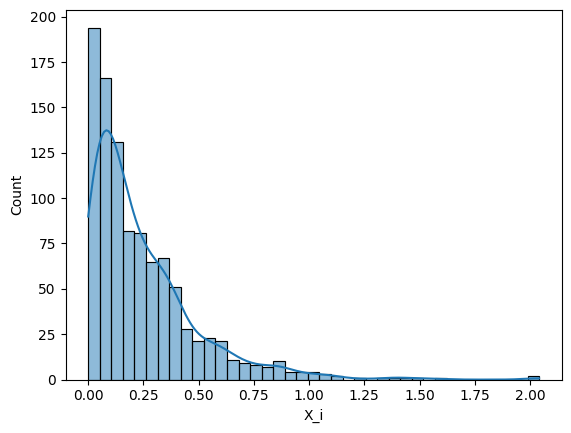

In [5]:
sns.histplot(data1["X_i"], kde = True)
plt.show()

In [6]:
# The distribution is positive and has a tail. Let's compare the qqplots
# of various distributions

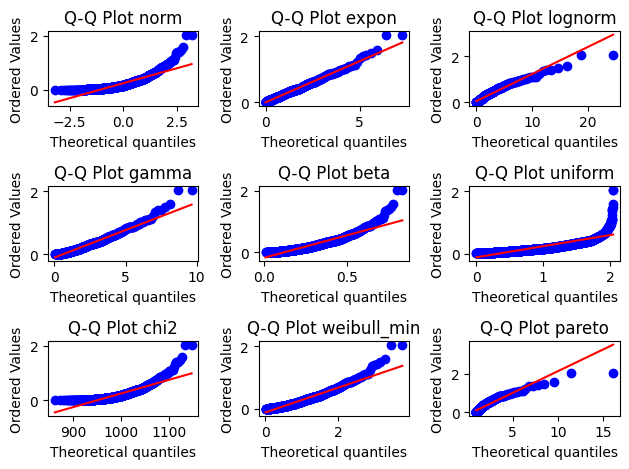

In [9]:
dists = {"norm": (), "expon": (), "lognorm": (1, ), "gamma": (2, ), "beta": (2, 5),
         "uniform":(min(data1["X_i"]), max(data1["X_i"])), "chi2": (999, ), "weibull_min": (1.5, ), "pareto": (2.62, )}
fig, axes = plt.subplots(nrows=3, ncols=3)

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data1["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

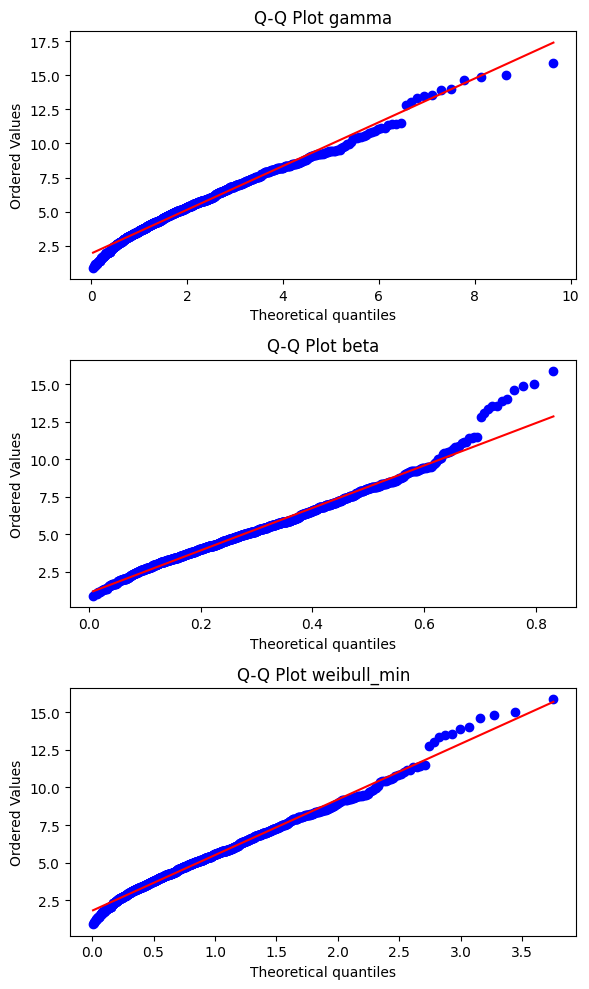

In [59]:
# Exponential and gamma distributions seem worth looking into.
dists = {"gamma": (2, ), "beta": (2, 5), "weibull_min": (1.5, )}
fig, axes = plt.subplots(nrows=3, figsize=(6, 10))

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data1["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk Test for normality
shapiro_test = shapiro(data1['X_i'])
print('Shapiro-Wilk Test:', shapiro_test)

# Kolmogorov-Smirnov Test against a normal distribution
ks_test = kstest(data1['X_i'], 'norm', args=(data1['X_i'].mean(), data1['X_i'].std()))
print('Kolmogorov-Smirnov Test:', ks_test)

# Anderson-Darling Test
anderson_test = anderson(data1['X_i'], dist='norm')
print('Anderson-Darling Test:', anderson_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.9487454309104417, pvalue=3.727337898531899e-18)
Kolmogorov-Smirnov Test: KstestResult(statistic=0.06810241359030733, pvalue=0.00017764721997255535, statistic_location=5.411425, statistic_sign=1)
Anderson-Darling Test: AndersonResult(statistic=9.42503908084575, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.132044758399999, scale=2.273665405939954)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [48]:
dists = {"norm": (), "expon": (), "lognorm": (1, ), "gamma": (), "beta": (2, 5),
         "uniform": (), "chi2": (999, ), "weibull_min": (1.5, ), "pareto": (2.62, )}
sparams = dists.get("pareto", ())
sparams

(2.62,)